In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from scipy.optimize import curve_fit
import os
import numpy as np
import glob

In [2]:
outpath_fig = './dataFolders/Output/Figures/ExponentionalFitWithBounds/'
outpath = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters/'

In [9]:
allData_df = pd.read_csv(file[0])
allData_df.head()

,Unnamed: 0,MothIn,MothOut,ProboscisDetect,DiscoveryTime,trialNum,name
0,0,31485,33858,31825.0,340.0,0,c-1_m10
1,1,35183,36433,35616.0,433.0,1,c-1_m10
2,2,37230,37741,37351.0,121.0,2,c-1_m10
3,3,37830,38106,NaN,NaN,3,c-1_m10
4,4,38344,38965,38438.0,94.0,4,c-1_m10


In [129]:
# bin data in sets of three

shapes = ['c-1', 'c-2','c-3', 'c-10']

for floralShape in shapes:
        
    file  = glob.glob(outpath + floralShape + '_Alltrials.csv')
    allData_df = pd.read_csv(file[0])
    
    binsize = 5
    trial_label = []
    trials = []
    
    for binned in range(0, max(allData_df.trialNum.values), binsize):
        
        subset = allData_df[(allData_df.trialNum == binned) & (allData_df.trialNum < binned + binsize)]
        
        trials.extend(subset.DiscoveryTime.values)
        trial_label.extend([str(binned) + '-' + str(binned + binsize -1)]*len(subset.DiscoveryTime.values))
                
    binned_df = pd.DataFrame({'trial_label': trial_label,
                              'trials':trials})
    binned_df.to_csv('./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters/' +
                    'BinnedBy5s_Data_for_' + floralShape + '.csv')

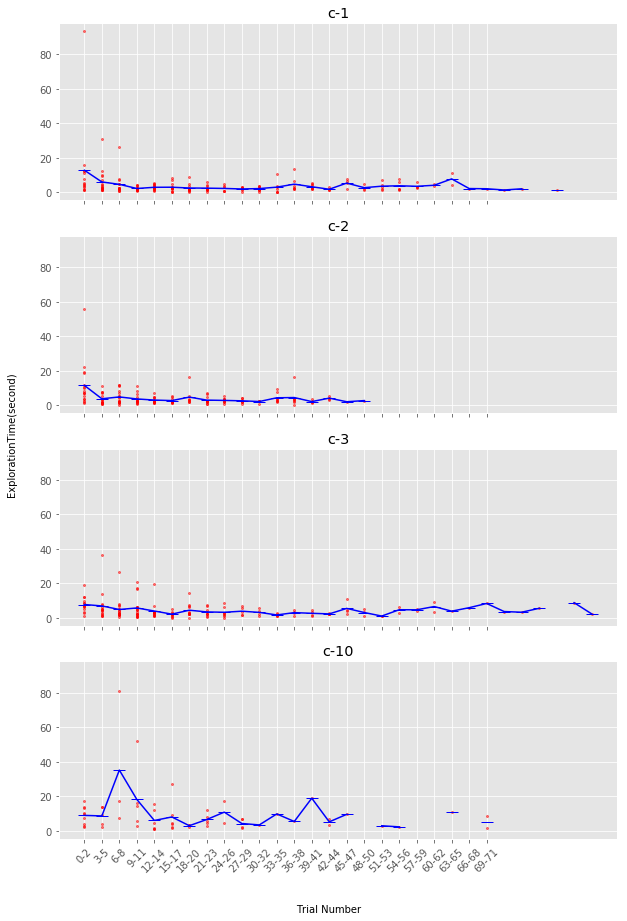

In [137]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (10,15))
ax = ax.ravel()

ctr = 0
for floralShape in shapes:
    binned_df = pd.read_csv(outpath + 'BinnedBy3s_Data_for_' + floralShape + '.csv')
    unique_label = binned_df.trial_label.unique()
    median = []
    for idx in unique_label:
        sub = binned_df[binned_df.trial_label == idx]
        ax[ctr].plot(sub.trial_label, sub.trials*1/100, 'ro', markersize = '2', alpha = 0.5)
        median.append(sub.trials.mean(skipna=True)*1/100)
    ax[ctr].plot(unique_label, median, c = 'blue', marker = '_', markersize = 12)
    ax[ctr].set_title(floralShape)
#     ax[ctr].set_ylabel('ExplorationTime(second)')
    
    ctr+=1
# ax[3].set_xticks(rotation=90)
fig.text(0.06, 0.5, 'ExplorationTime(second)',
        ha = 'center', va='center', rotation = 'vertical')
fig.text(0.5, 0.06, 'Trial Number',
        ha = 'center', va='center', rotation = 'horizontal')
plt.xticks(rotation = 45)
plt.savefig(outpath_fig + 'ExplorationTime_BinnedBy3s.png')

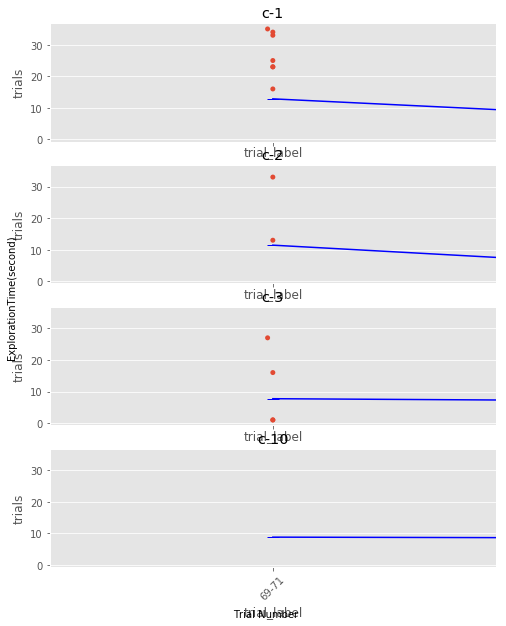

In [134]:
import seaborn as sns

shapes = ['c-1', 'c-2','c-3', 'c-10']
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (8,10))
ax = ax.ravel()

ctr = 0
for floralShape in shapes:
    binned_df = pd.read_csv(outpath + 'BinnedBy3s_Data_for_' + floralShape + '.csv')
    unique_label = binned_df.trial_label.unique()
    median = []
    for idx in unique_label:
        sub = binned_df[binned_df.trial_label == idx]
#         sns.swarmplot(x = 'trial_label', y = 'trials', data = sub, ax = ax[ctr] )
        ax[ctr].plot(sub.trial_label, sub.trials*1/100, 'ro', markersize = '2', alpha = 0.5, jitter)
        median.append(sub.trials.mean(skipna=True)*1/100)
    ax[ctr].plot(unique_label, median, c = 'blue', marker = '_', markersize = 12)
    ax[ctr].set_title(floralShape)
#     ax[ctr].set_ylabel('ExplorationTime(second)')
    
    ctr+=1
# ax[3].set_xticks(rotation=90)
fig.text(0.06, 0.5, 'ExplorationTime(second)',
        ha = 'center', va='center', rotation = 'vertical')
fig.text(0.5, 0.06, 'Trial Number',
        ha = 'center', va='center', rotation = 'horizontal')
plt.xticks(rotation = 45)
plt.savefig(outpath_fig + 'ExplorationTime_BinnedBy3s.png')

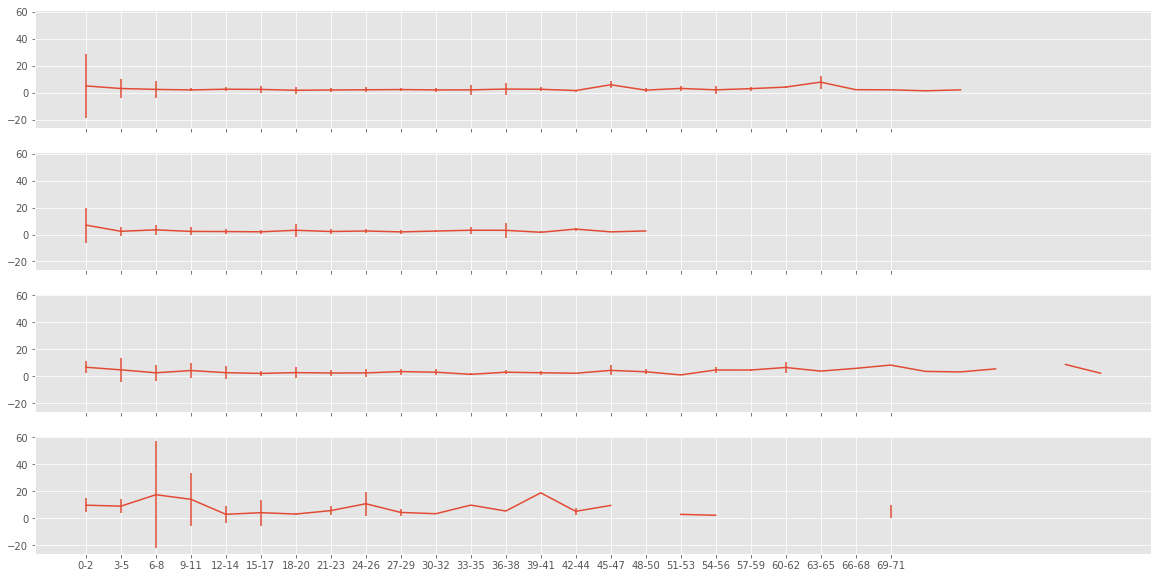

In [44]:
shapes = ['c-1', 'c-2','c-3', 'c-10']
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (20,10))
ax = ax.ravel()

ctr = 0
for floralShape in shapes:
    binned_df = pd.read_csv(outpath + 'Binned_Data_for_' + floralShape + '.csv')
    ax[ctr].errorbar(binned_df.trial_label, binned_df['median']/100, yerr = binned_df['std']/100)
    ctr+=1